<a href="https://colab.research.google.com/github/JuliaPetropavlovskaya/DL_and_CV_course/blob/master/NonLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn import datasets
style.use('seaborn-whitegrid')

### Dataset

In [0]:
# create dataset
n_pts=500

# we create centers of the futer clusters
# to make separation more difficult
X, y = datasets.make_circles(n_samples=n_pts, 
                          random_state = 123,
                          noise = 0.1,
                          factor = 0.2)
#print(X)
#print(y)

In [0]:
def ScatterPlot():
  style.use('seaborn-dark-palette')
  sns.scatterplot(x = X[y==0,0], y = X[y==0,1])
  sns.scatterplot(x = X[y==1,0], y = X[y==1,1])

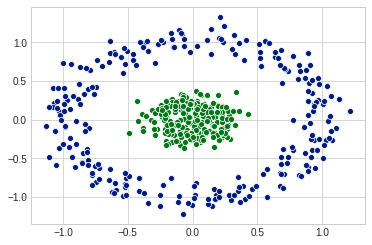

In [5]:
ScatterPlot()

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

#### NonLinear 2 layered simple NN

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1 ,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return int(0)

In [8]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
# Our criterion
criterion = nn.BCELoss()
# Update of the parameters
# In SGD or VGD we have to be very carefull,
# while choosing the learning rate. Adam is not so sensitive.
# Adam optimizer adaptively calculate the learning rate 
# for each parameter individually and its very effective
# when we deal with large data sets, so it's good as default 
# algorithm
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.1)

In [10]:
epochs = 1000
losses = []
n = 0
for i in range(epochs):
  
  # make predictions
  y_pred = model.forward(x_data)
  
  # Loss
  loss = criterion(y_pred, y_data)
  
  # Print each 50 results
  if (len(losses) == n) or (i == 499):
    
    print("epoch:", i, "loss", loss.item())
    
    n += 50
  
  
  losses.append(loss.item())

  #set gradients to zero
  optimizer.zero_grad()

  # back propagate our loss
  loss.backward()

  # calculate SGD. Step method is used to update parameters
  optimizer.step()

epoch: 0 loss 0.7148522138595581


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch: 50 loss 0.4164563715457916
epoch: 100 loss 0.07127666473388672
epoch: 150 loss 0.02683403715491295
epoch: 200 loss 0.01712038740515709
epoch: 250 loss 0.012399842962622643
epoch: 300 loss 0.009558714926242828
epoch: 350 loss 0.007655191235244274
epoch: 400 loss 0.006291310302913189
epoch: 450 loss 0.00527499383315444
epoch: 499 loss 0.004515173379331827
epoch: 550 loss 0.0039023070130497217
epoch: 600 loss 0.0034283529967069626
epoch: 650 loss 0.0030456148087978363
epoch: 700 loss 0.002730433363467455
epoch: 750 loss 0.0024663894437253475
epoch: 800 loss 0.0022419511806219816
epoch: 850 loss 0.0020488593727350235
epoch: 900 loss 0.0018810416804626584
epoch: 950 loss 0.0017339272890239954


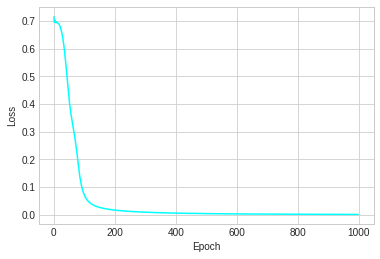

In [11]:
plt.plot(range(epochs), losses, color = "aqua")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#### Model Testing

In [0]:
def plot_decision_boundary(X,y):
  # generate 50 dots, setting boundaries 
  # according to min/max values of X
  x_span = np.linspace(min(X[:,0]), max(X[:,0]))
  y_span = np.linspace(min(X[:,1]), max(X[:,1]))
  
  # create matrixes which set x in correspondence for each y
  # notice that y here is y-axis not a target value
  # as a result we get two 50x50 matrixes
  xx,yy = np.meshgrid(x_span, y_span)
  
  # ravel flatens xx and yy to one-dimentional array
  xx.ravel(), yy.ravel()
  
  # coordinate our arrays into colomns using np.c_
  # us a result we get one tensor, which we can pass 
  # to our model and get predicted labels 1/0 
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  
  # predict target values for each new dot
  # as a result we should get 50 predictions
  pred_func = model.forward(grid)
  
  # now we need to reshape results in the shape of xx or yy
  # to make it possible to build scatter plot
  # detach excludes any subgraphs from gardient computation 
  z = pred_func.view(xx.shape).detach().numpy()
  
  
  plt.contourf(xx,yy,z)

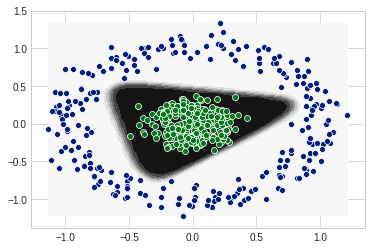

In [13]:
plot_decision_boundary(X,y)

ScatterPlot()